# Traffic Simulation

### Notes from the readings:

<code>Original paper</code> 
- Nagel, K., Schreckenberg, M. (1992). A cellular automaton model for freeway traffic.  Journal de Physique I, 2(12), 2221–2229. Retrieved from: https://course-resources.minerva.kgi.edu/uploaded_files/mke/YpqvNV/nagel-schreckenberg.pdf

The update of the system consists of the following steps:
1. Acceleration: if the velocity $v$ is lower than $v_{max}$ and if the distance to the next car ahead is larger than $v+1$, the speed is advanced by one $v \rightarrow v+1$
2. Slowing down (due to other cars): if a vehicle at site $i$ sees the next vehicle at site $i+j$ (with $j\leq v$), it reduces the speed to $j-1$ as $v \rightarrow j-1$
3. Randomization: with probability $p$, the velocity of each vehicle (if greater than zero) is decreased by one $v \rightarrow v-1$
4. Car motion: each vehicle is advanced $v$ sites.

In [243]:
# Importing packages
import numpy as np
import random as rn
import seaborn as sns
from matplotlib import rc
import matplotlib.pyplot as plt

rc('font', **{'family': 'serif', 
              'serif': ['Computer Modern'], 'size': 16})
rc('text', usetex=True)

In [372]:
class TrafficSimulation:  
    def __init__(self, length, density, v_max, p_slow, steps):
        
        self.length = length   # Road length
        self.density = density # Traffic density
        self.v_max = v_max     # Maximum velocity
        self.p_slow = p_slow   # The probability of slowing down
        
        self.steps = steps
        self.flow = 0
        
        self.state = self.initialize_state()
        
    def initialize_state(self):
        state = np.full(self.length, -1)
        for _ in range(self.length):
            if rn.random() <= self.density:
                state[_] = rn.randint(0, 5)
        return state
    
    def accelerate(self, cell):
        if cell in range(5): cell+=1
        return cell
    
    def decelerate(self, idx, cell):
        if cell>0:
            space = 0
            horizon = np.concatenate([self.state[idx+1:], 
                                      self.state[0:idx-1]])
            for next_cell in horizon[0:self.v_max]:
                if next_cell>-1: 
                    break 
                else: 
                    space+=1
            if space<cell: cell=space
        return cell
    
    def randomize(self, cell):
        if cell>0 and rn.random() <= self.p_slow: cell-=1
        return cell
    
    def move(self):
        new_state = np.full(self.length, -1)
        for idx,cell in enumerate(self.state):
            if (idx+cell) > self.length-1: 
                #print(idx, cell)
                self.flow+=1
            if cell>-1:
                new_state[(idx+cell)%self.length]=cell
        self.state = new_state
    
    def update(self, display):
        if display:
            self.display()
        for _ in range(len(self.state)):
            self.state[_] = self.accelerate(self.state[_])
            self.state[_] = self.decelerate(_, self.state[_])
            self.state[_] = self.randomize(self.state[_])
        self.move()
        
    def output(self, display=False):
        states = []
        for i in range(self.steps):
            states.append(self.update(display))
    
    def display(self):
        print(''.join('.' if x == -1 else str(x) for x in self.state))

Use the following model parameters for the first figure.
- Road length: 100
- Traffic density: 0.03
- Maximum velocity: 5
- Probability of slowing down: 0.5


Use these model parameters for the second figure. (The traffic density is different.)
- Road length: 100
- Traffic density: 0.1
- Maximum velocity: 5
- Probability of slowing down: 0.5

In [380]:
Sim = TrafficSimulation(100, .03, 5, 0.5, 20)
Sim.output(display=True)
print('\nThe number of cars crossing the end: ', Sim.flow,
      'After time steps: ', Sim.steps)

................2.......4...........0..............1..........2..2.................4................
...................3........4.......0................2..........2..2....................5...........
.......................4.........5..0..................2..........2..2.......................5......
............................5.....1.0....................2..........2...3.........................5.
...5.............................5.1.1......................3.........2.....4.......................
........5........................0..1.1.........................4........3......4...................
............4.....................1..1..2............................5......3........5..............
................4...................2..2...3..............................5....3..........5.........
....................4................1....3....4..............................4....4...........5....
5........................5.............2.....3.....4..............................4....4...

In [385]:
Sim = TrafficSimulation(100, .2, 5, 0.5, 20)
Sim.output(display=True)
print('\nThe number of cars crossing the end: ', Sim.flow,
      'After time steps: ', Sim.steps)

....4..325....22.....1455.........3.............3....0........35.2.5.........2..25......5.......2...
......200....40..2...000....4.........4.............4.1.......0.10.....4......1.0....4......4......3
...4..000....00....2.00.1.......4.........4.........0..1.......100..........5..10.........5......5..
..5.1.00.1...00....0.0.1.1..........4.........4......1..1......000............20.1.............5....
5..1.100..1..0.1...0..1.1.1..............5........4...1..1.....000............00..1.................
..20.00.1...20..1...1.0..1.1.................4......2..1..1....000............00....2...............
..00.0.1.1..0.1..1..0.0..0...2...................4...1..1..1...00.1...........0.1.....2.............
..0.1.1.1.1.0...2.1..10...1....2...................2..1...2.1..00..1..........0..1......2...........
..0..10..10.0....1.1.00.....2....2..................1..1..0...200...1..........1..1.......2.........
...1.00..0.1.1....10.00........3....3................1...2.1..000....1...........2.1.......

In [418]:
den_list = np.linspace(.01, .8, 200)
flow_rate = []

# Set the initial conditions
road_length = 100
max_velocity = 5
time_steps = 50
proba_slow = .5

# Produce the flow vs. density graph
for density in den_list:
    for _ in range(50):
        temp = []
        sim = TrafficSimulation(road_length, density, 
                                max_velocity, proba_slow, time_steps)
        sim.output(display=False)
        temp.append(sim.flow / sim.steps)
    flow_rate.append(np.mean(temp))

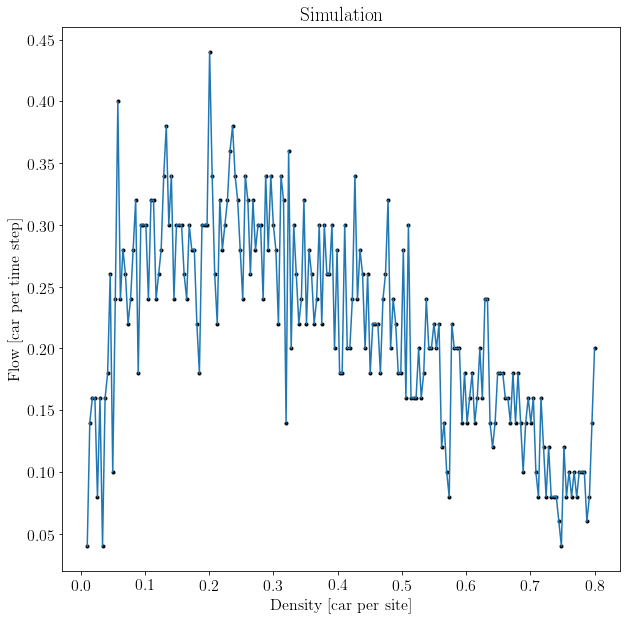

In [424]:
plt.figure(figsize=(10, 10))
plt.plot(den_list, flow_rate, 'k.')
plt.plot(den_list, flow_rate)
plt.title('Simulation')
plt.xlabel('Density [car per site]')
plt.ylabel('Flow [car per time step]')
plt.show()